<a href="https://colab.research.google.com/github/brendanbautista/is_4487_base/blob/main/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders (1).csv')


Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [4]:
df.dtypes
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df_cleaned = df.dropna()
df_cleaned.head(), df_cleaned.dtypes

df_cleaned = df_cleaned[df_cleaned['quantity'] <= 10]
df_cleaned = df_cleaned[df_cleaned['product_price'] != 235481]

def month_num_to_abbr_only(month_year_str):
    _, month_num = month_year_str.split('-')
    month_abbr = pd.to_datetime(month_num, format='%m').strftime('%b')
    return month_abbr

df_cleaned['order_month_abbr_only'] = df_cleaned['order_year_month'].apply(month_num_to_abbr_only)

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

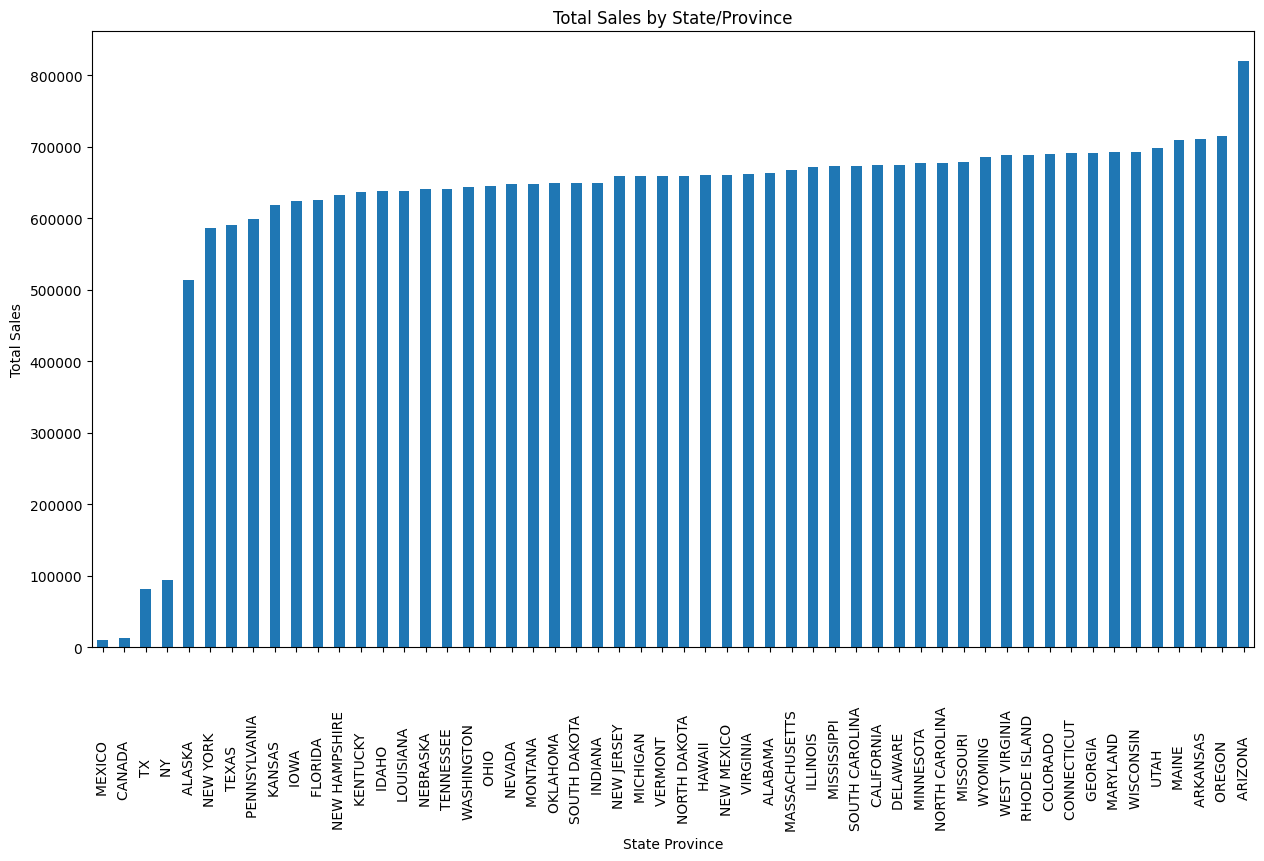

In [5]:
#bar chart
df_cleaned['total_sales'] = df_cleaned['quantity'] = df_cleaned['product_price']
bar_chart_data_state = df_cleaned.groupby('state_province')['total_sales'].sum().sort_values()
plt.figure(figsize=(15,8))
bar_chart_data_state.plot(kind='bar')
plt.title('Total Sales by State/Province')
plt.ylabel('Total Sales')
plt.xlabel('State Province')
plt.xticks(rotation=90)
plt.show()

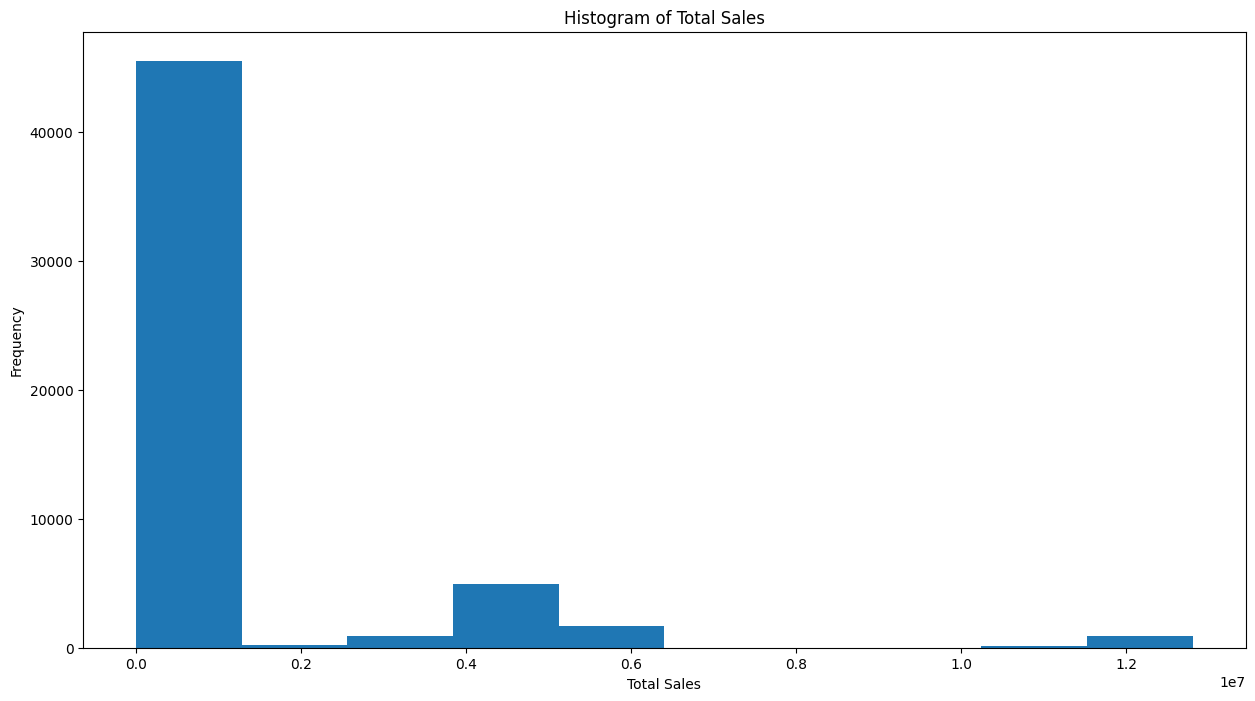

In [15]:
#histogram
histogram_data_sales = df_cleaned['total_sales']
plt.figure(figsize=(15,8))
plt.hist(histogram_data_sales, bins=10)
plt.title('Histogram of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


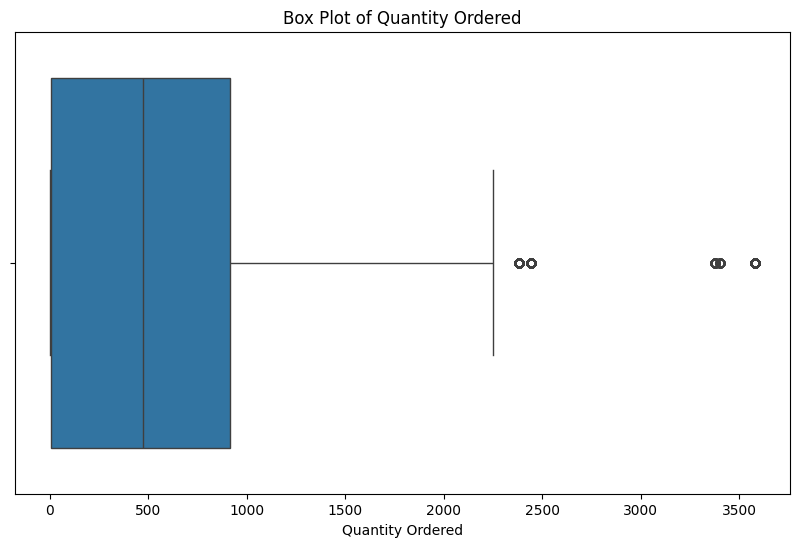

In [7]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['quantity'])
plt.title('Box Plot of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.show()

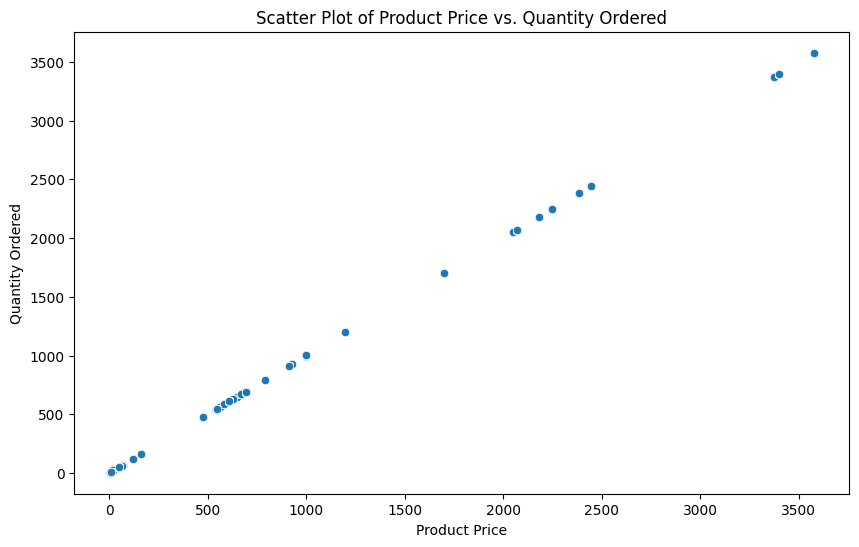

In [8]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['product_price'], y=df_cleaned['quantity'])
plt.title('Scatter Plot of Product Price vs. Quantity Ordered')
plt.xlabel('Product Price')
plt.ylabel('Quantity Ordered')
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

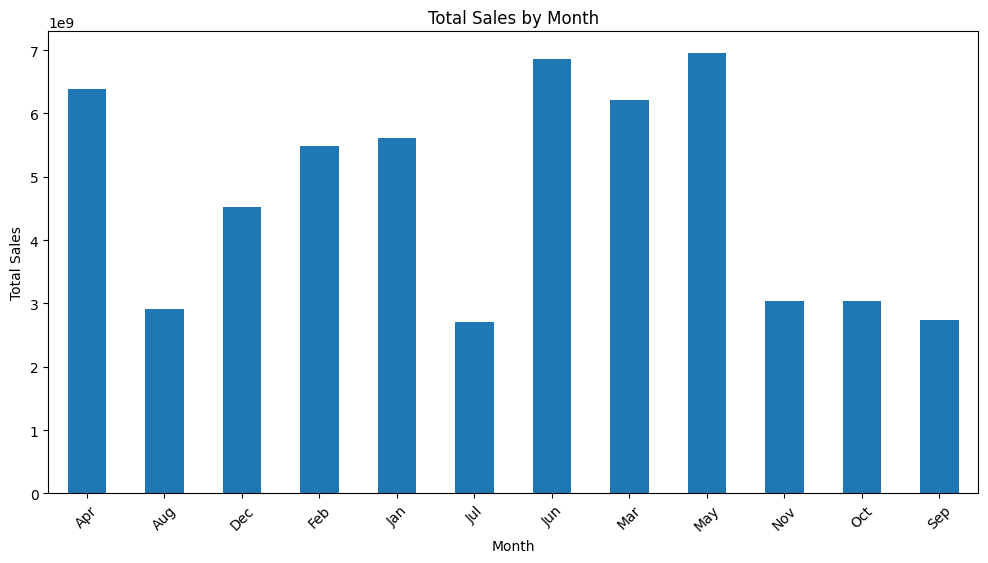

In [9]:
#month of year
df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']

def month_num_to_abbr_only(month_year_str):
    _, month_num = month_year_str.split('-')
    month_abbr = pd.to_datetime(month_num, format='%m').strftime('%b')
    return month_abbr

df_cleaned['order_month_abbr_only'] = df_cleaned['order_year_month'].apply(month_num_to_abbr_only)

month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_cleaned['month_order'] = df_cleaned['order_month_abbr_only'].map(month_order)

df_cleaned_sorted_by_month = df_cleaned.sort_values('month_order')

monthly_sales_by_abbr = df_cleaned_sorted_by_month.groupby('order_month_abbr_only')['total_sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales_by_abbr.plot(kind='bar')
plt.title('Total Sales by Month')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)  # Rotate the month labels for better readability
plt.show()

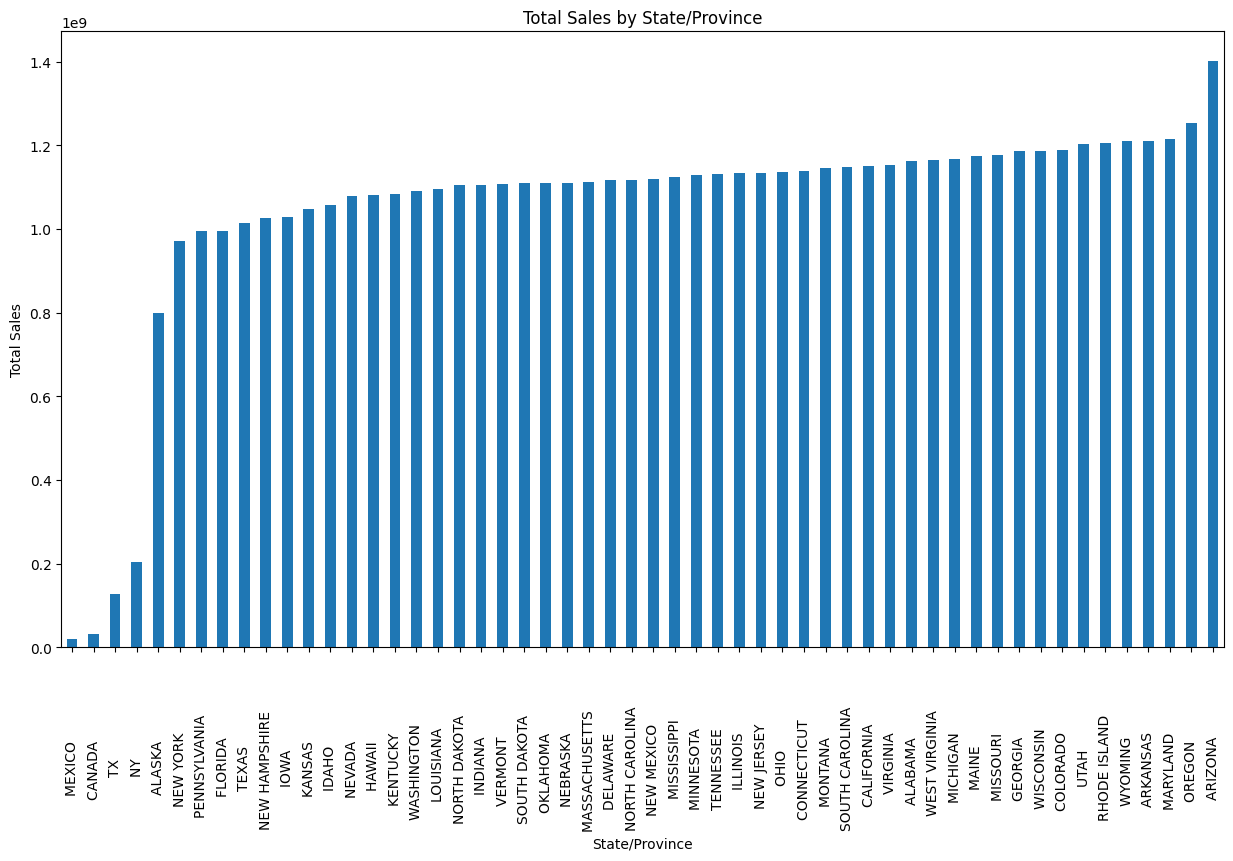

In [10]:
#sales by state
df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']
bar_chart_data_state = df_cleaned.groupby('state_province')['total_sales'].sum().sort_values()
plt.figure(figsize=(15,8))
bar_chart_data_state.plot(kind='bar')
plt.title('Total Sales by State/Province')
plt.ylabel('Total Sales')
plt.xlabel('State/Province')
plt.xticks(rotation=90)
plt.show()

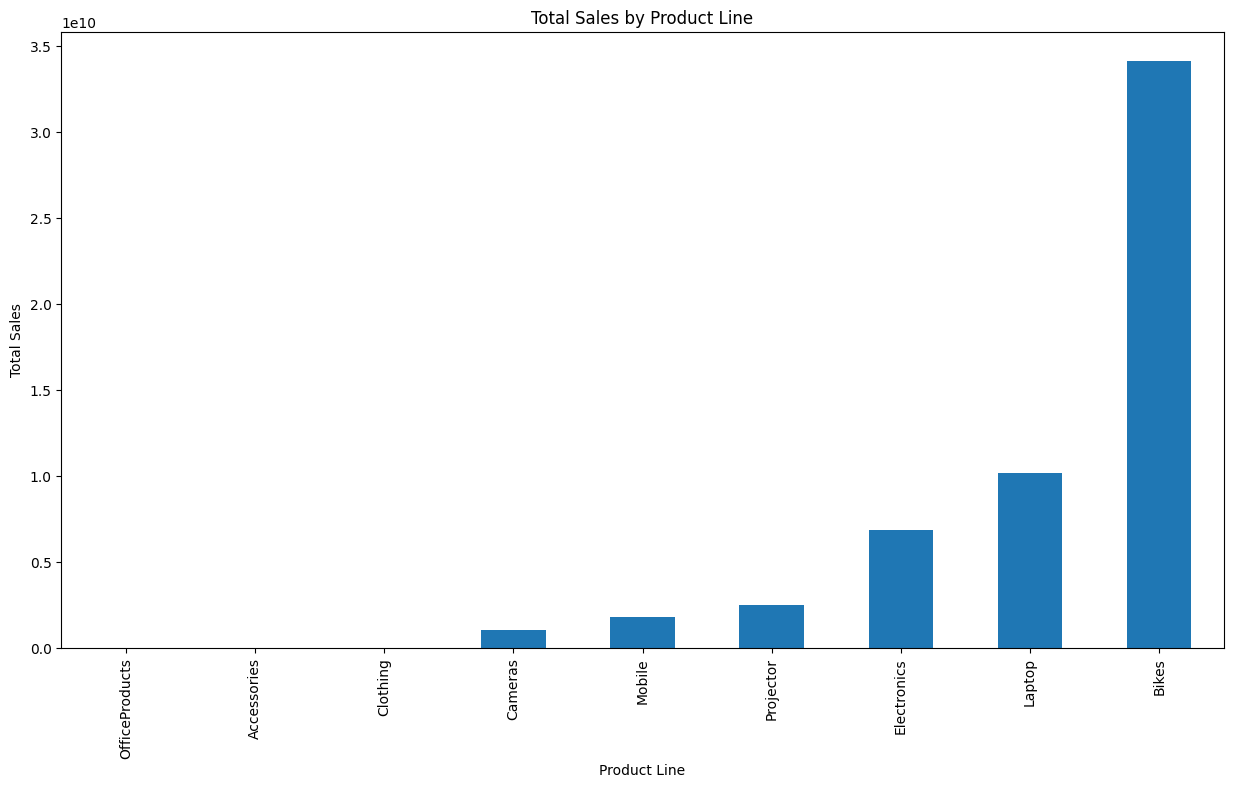

In [11]:
#sales by product
df_cleaned['total_sales'] = df_cleaned['quantity'] * df_cleaned['product_price']
bar_chart_data_product = df_cleaned.groupby('product_line')['total_sales'].sum().sort_values()
plt.figure(figsize=(15,8))
bar_chart_data_product.plot(kind='bar')
plt.title('Total Sales by Product Line')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.xticks(rotation=90)
plt.show()

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

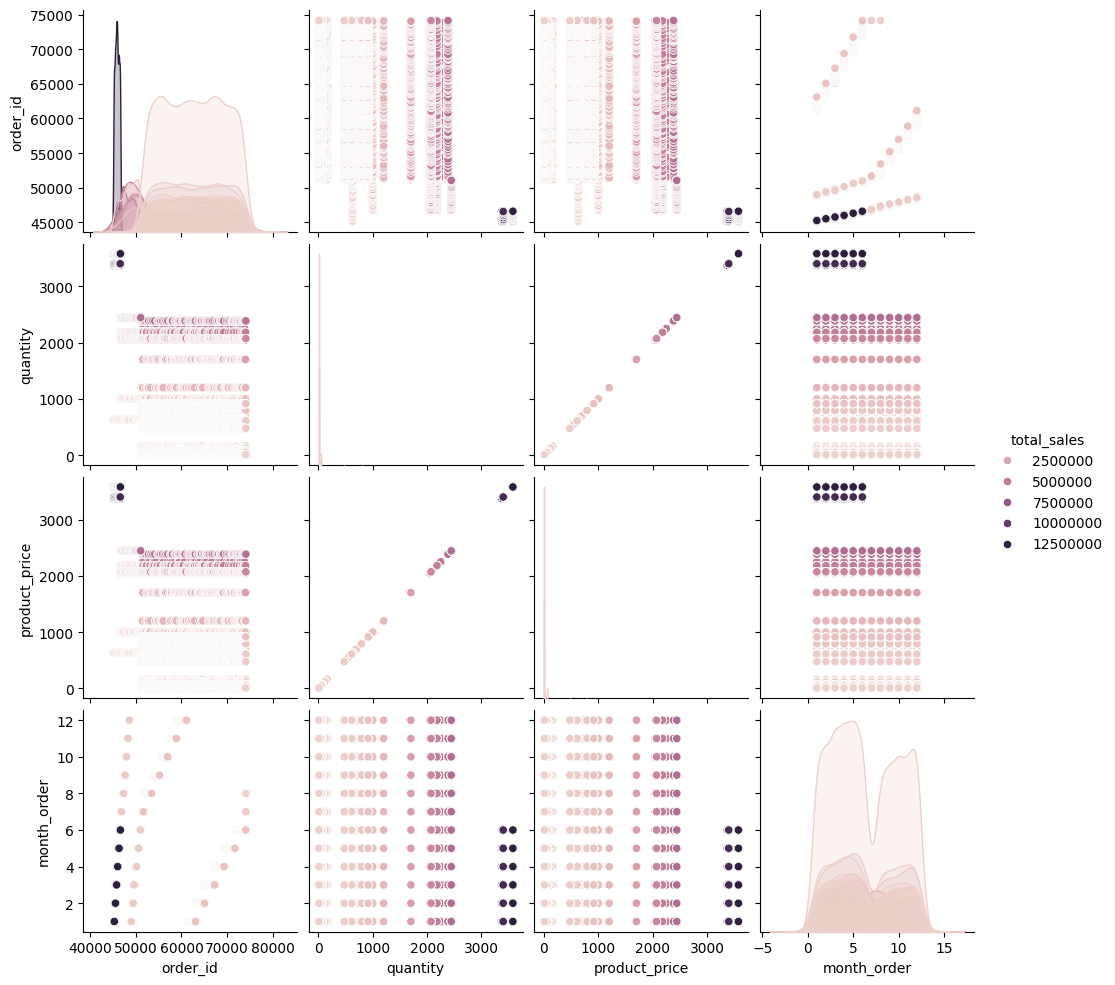

In [12]:
#pair plot
sns.pairplot(df_cleaned, hue = 'total_sales')